<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/rolling_coor_usdinr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --q


     |████████████████████████████████| 62 kB 1.0 MB/s 


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

import datetime
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [3]:
data = pd.read_csv('/content/usd.csv')

In [4]:
data['date']=data.time.apply(lambda d: datetime.datetime.fromtimestamp(int(d)).strftime('%d-%m-%Y'))

In [5]:
del data['time']

In [6]:
data= data.set_index('date')

In [7]:
data=data['10-02-2017':]

In [8]:
data_subset = data[['close','USDINR, IDC: Close']]

In [9]:
data_subset.columns=['close','close1']

In [10]:
data_subset['corr_running']=data_subset['close'].rolling(window=60).corr(data_subset['close1']).fillna(0.01)

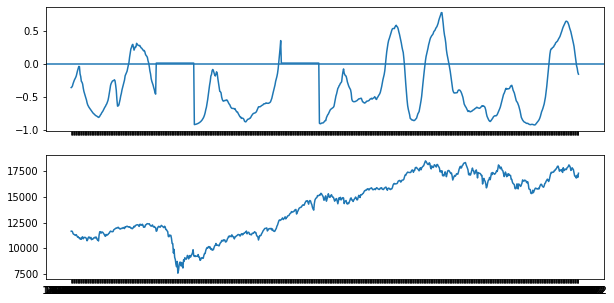

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(10,5),sharex=True)
ax[0].plot(data_subset['corr_running'][-800:])
ax[1].plot(data_subset['close'][-800:])
ax[0].axhline(y=0)
plt.show()